In [20]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [8]:
pip install --upgrade scikit-learn mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 1.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 1.0 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 963.0 kB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 963.0 kB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 775.6 kB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 821.1 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 816.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression()

sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

In [11]:
model = sel.fit(df.iloc[:,:4],df['species'])

d:\CODES\Machine-Learning-From-Scratch\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Features: 15/15

In [12]:
model.best_score_

np.float64(0.9733333333333334)

In [13]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [14]:
# detailed output
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': np.float64(0.5666666666666667),
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': np.float64(0.8133333333333332),
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': 

In [15]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal_width,)",0.046932,0.036515,0.018257
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal_length, sepal_width)",0.069612,0.05416,0.02708
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


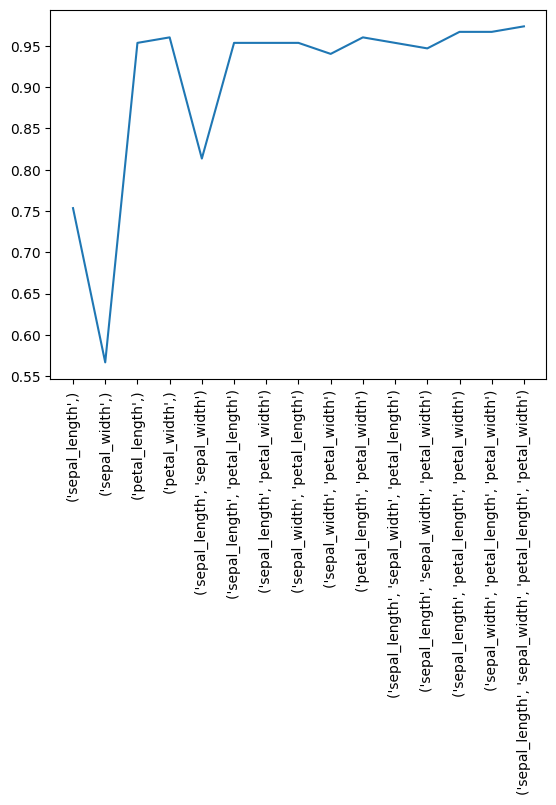

In [16]:
import matplotlib.pyplot as plt

plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

### Regression Example

In [18]:
df_2 = pd.read_csv('../Datasets/HousingData.csv')
df_2.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
368,4.89822,0.0,18.10,0.0,0.631,4.970,NaN,1.3325,24,666,20.2,375.52,3.26,50.0
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8,284,19.7,396.90,9.22,19.6
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2,329,12.6,392.20,6.62,34.6
376,15.28800,0.0,18.10,NaN,0.671,6.649,93.3,1.3449,24,666,20.2,363.02,NaN,13.9
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24,666,20.2,21.57,25.79,7.5
131,1.19294,0.0,21.89,0.0,0.624,6.326,97.7,2.2710,4,437,21.2,396.90,12.26,19.6
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,NaN,23.4
404,41.52920,0.0,18.10,0.0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_2.iloc[:,:-1],df_2['MEDV'],test_size=0.2,random_state=42)

In [24]:
print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


In [32]:
# check null values in the dataset

print(np.isnan(x_train).sum())
print(np.isnan(x_test).sum())
print(np.isnan(y_test).sum())
print(np.isnan(y_train).sum())

100
20
0
0


In [33]:
# remove null values from x_train and x_test

x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)
# this will replace all the null values with 0 and inf values with large finite numbers. This is a common technique to handle missing values in the dataset. 

In [34]:
# feature scaling to improve the performance of the model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
# Baseline model

import numpy as np
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(x_train,y_train)

print("Training : " ,np.mean(cross_val_score(model,x_train,y_train,cv=5, scoring='r2')))
print("Testing : " , np.mean(cross_val_score(model,x_test,y_test,cv=5, scoring='r2')))

Training :  0.7128114823466657
Testing :  0.5282616382517838


This shows that their is overfitting because the training score is very high than the testing score. 

In [37]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(x_train, y_train)

Features: 8191/8191

In [38]:
sel.best_score_

np.float64(0.6917726744880467)

In [39]:
sel.best_feature_names_

('0', '3', '4', '5', '7', '8', '9', '10', '11', '12')

In [40]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.09354373418319828, 0.1895531779730154, 0.13...",0.106345,"(0,)",0.064661,0.087061,0.02902
1,"(1,)","[-0.05842790968446798, 0.07806650426578277, 0....",0.080274,"(1,)",0.039621,0.053347,0.017782
2,"(2,)","[0.252605330715985, 0.2430812567241396, 0.1525...",0.188235,"(2,)",0.058046,0.078154,0.026051
3,"(3,)","[-0.0688689139857126, -0.12549755012874741, 0....",0.001984,"(3,)",0.064307,0.086583,0.028861
4,"(4,)","[0.18831320204786606, 0.15611671149828155, 0.1...",0.15303,"(4,)",0.053874,0.072536,0.024179
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8047525150725331, 0.7881180569717151, 0.720...",0.686702,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.110382,0.14862,0.04954
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7901880631988636, 0.7822249412635349, 0.744...",0.690069,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.116358,0.156666,0.052222
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.786331474338851, 0.7898708194126731, 0.7413...",0.68811,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.116155,0.156392,0.052131
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7868827465057082, 0.7634561839606212, 0.737...",0.680864,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.11513,0.155013,0.051671


In [41]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef

In [42]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [43]:
metric_df.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
8029,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8002619642170692, 0.7981530445166066, 0.737...",0.691773,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.119882,0.161411,0.053804,404,10,0.68393
7590,"(0, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8122394097041488, 0.8046632965507161, 0.716...",0.690482,"(0, 4, 5, 7, 8, 9, 10, 11, 12)",0.114677,0.154402,0.051467,404,9,0.683411
7566,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7829579579901148, 0.7949277404149904, 0.744...",0.69022,"(0, 3, 4, 5, 7, 8, 10, 11, 12)",0.12352,0.166309,0.055436,404,9,0.683144
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.800834910778031, 0.787243769802719, 0.73987...",0.691514,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.118564,0.159636,0.053212,404,11,0.682857
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8125527325681208, 0.7934380247652402, 0.718...",0.690044,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.112821,0.151904,0.050635,404,10,0.682157
...,...,...,...,...,...,...,...,...,...,...
1,"(1,)","[-0.05842790968446798, 0.07806650426578277, 0....",0.080274,"(1,)",0.039621,0.053347,0.017782,404,1,0.077986
30,"(1, 7)","[-0.056815346507328224, 0.08456542435978642, 0...",0.078369,"(1, 7)",0.039669,0.053411,0.017804,404,2,0.073773
49,"(3, 7)","[-0.05217263655354287, -0.051900285240861876, ...",0.064006,"(3, 7)",0.072009,0.096954,0.032318,404,2,0.059338
7,"(7,)","[-0.020714728360076817, 0.06907241897075367, 0...",0.036859,"(7,)",0.036497,0.04914,0.01638,404,1,0.034463


In [45]:
X_train_sel = sel.transform(x_train)
X_test_sel = sel.transform(x_test)

In [46]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7162574568842076
testing 0.5298053939512192


### Sequential Backward Elimination